Aqui montamos a nossa conta drive dentro do google colab, para podermos resgatar os arquivos de imagem usados.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt

Fazemos a chamada das imagens (query e treino, respectivamente). 

**LEMBRAR DE ATUALIZAR O CAMINHO DAS VARIÁVEIS DE IMAGEM P/ AS SUAS IMAGENS**

In [3]:
img1 = cv.imread('/content/drive/MyDrive/Curso Video Analytics/livro.jpg', 0) #livro query
img2 = cv.imread('/content/drive/MyDrive/Curso Video Analytics/completo.jpg', 0) #treino

In [4]:
# Iniciando o ORB detector
orb = cv.ORB_create()

# Através do ORB é achado os keyponts e descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [5]:
# Iniciando o BFMatcher
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck = True) #Usamos essa distância padrão no ORB (cv.NORM_HAMMING) e partindo do método Matcher.match() pegamos os melhores matches

# Ver os match dos descriptors
matches = bf.match(des1, des2)
# Ordena de acordo com a distância
matches = sorted(matches, key = lambda x:x.distance)

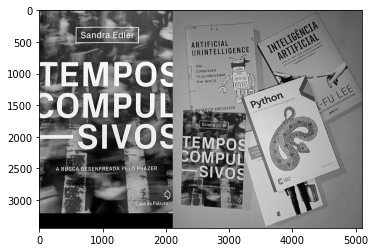

In [7]:
# Selecionamos os 10 melhores matches 
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], 800, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Plotamos a imagem
plt.imshow(img3)
plt.show()